In [2]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Decision Trees:

Loading the dataset:

In [3]:
df = pd.read_csv("/content/Decision_trees_1.csv")

# EDA:

In [4]:
df.head()

,Customer ID,Gender,Car Type,Shirt Size,Class
0,1,M,Family,Small,C0
1,2,M,Sports,Medium,C0
2,3,M,Sports,Medium,C0
3,4,M,Sports,Large,C0
4,5,M,Sports,Extra large,C0


In [5]:
df.describe()

,Customer ID
count,20.00000
mean,10.50000
std,5.91608
min,1.00000
25%,5.75000
50%,10.50000
75%,15.25000
max,20.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  20 non-null     int64 
 1   Gender       20 non-null     object
 2   Car Type     20 non-null     object
 3   Shirt Size   20 non-null     object
 4   Class        20 non-null     object
dtypes: int64(1), object(4)
memory usage: 928.0+ bytes


In [7]:
df.shape

(20, 5)

In [8]:
from sklearn import preprocessing

### Label Encoding the features (Categorical -> Numerical data).

In [10]:
label_encoder = preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder()
df["Class"] = label_encoder.fit_transform(df["Class"])
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Car Type"] = label_encoder.fit_transform(df["Car Type"])
df["Shirt Size"] = label_encoder.fit_transform(df["Shirt Size"])

In [11]:
df

,Customer ID,Gender,Car Type,Shirt Size,Class
0,1,1,0,3,0
1,2,1,2,2,0
2,3,1,2,2,0
3,4,1,2,1,0
4,5,1,2,0,0
5,6,1,2,0,0
6,7,0,2,3,0
7,8,0,2,3,0
8,9,0,2,2,0
9,10,0,1,1,0


In [12]:
X = df[["Gender", "Car Type", "Shirt Size"]]

In [15]:
X.head()

,Gender,Car Type,Shirt Size
0,1,0,3
1,1,2,2
2,1,2,2
3,1,2,1
4,1,2,0


In [14]:
Y = df["Class"]

In [18]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = None, min_samples_leaf = 1)

In [21]:
clf_gini.fit(X, Y)

DecisionTreeClassifier(random_state=100)

In [22]:
from sklearn import tree

### Car Type seems to be the Root Node from the given image:

[Text(0.6666666666666666, 0.9, 'x[1] <= 1.5\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.5555555555555556, 0.7, 'x[2] <= 2.5\ngini = 0.278\nsamples = 12\nvalue = [2, 10]'),
 Text(0.3333333333333333, 0.5, 'x[2] <= 1.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.2222222222222222, 0.3, 'x[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7777777777777778, 0.5, 'x[0] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.7777777777777778, 0.7, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]')]

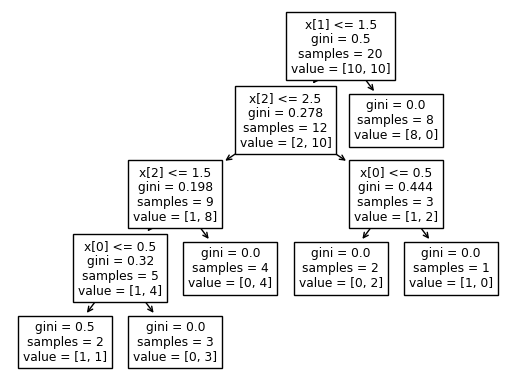

In [23]:
tree.plot_tree(clf_gini)

### Using Entropy now, instead of Gini Index:

In [24]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = None, min_samples_leaf = 1)

In [25]:
clf_entropy.fit(X, Y)

DecisionTreeClassifier(criterion='entropy', random_state=100)

[Text(0.5, 0.9, 'x[1] <= 1.5\nentropy = 1.0\nsamples = 20\nvalue = [10, 10]'),
 Text(0.375, 0.7, 'x[2] <= 0.5\nentropy = 0.65\nsamples = 12\nvalue = [2, 10]'),
 Text(0.25, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.5, 0.5, 'x[1] <= 0.5\nentropy = 0.722\nsamples = 10\nvalue = [2, 8]'),
 Text(0.25, 0.3, 'x[2] <= 2.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.125, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.375, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.3, 'x[2] <= 1.5\nentropy = 0.592\nsamples = 7\nvalue = [1, 6]'),
 Text(0.625, 0.1, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.875, 0.1, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.7, 'entropy = 0.0\nsamples = 8\nvalue = [8, 0]')]

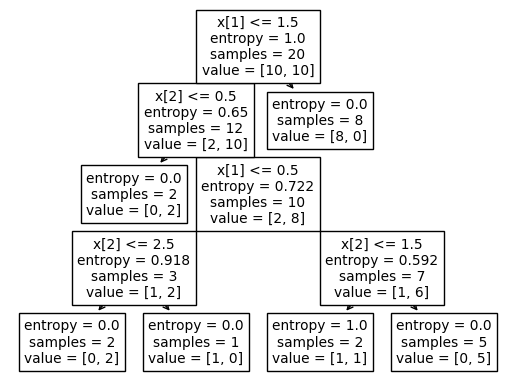

In [26]:
tree.plot_tree(clf_entropy)

### Loading another dataset:

In [27]:
df = pd.read_csv("/content/diabetes_1.csv")

### EDA:

In [28]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [29]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
df.shape

(768, 9)

Since this is a classification dataset (specifically binary), we don't need the Outcomes attribute so we can drop that column from the dataset.

In [32]:
X1 = df.drop("Outcome", axis = 1)

In [34]:
X1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [35]:
y1 = df["Outcome"]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X1, y1, test_size = 0.2, random_state = 0) # 80:20 ratio for train to test.

Testing with Gini Index first:

In [86]:
model_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = None, min_samples_leaf = 1)

In [87]:
model_gini.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=100)

[Text(0.4033954326923077, 0.9642857142857143, 'x[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(0.14483173076923078, 0.8928571428571429, 'x[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(0.052884615384615384, 0.8214285714285714, 'x[5] <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.028846153846153848, 0.75, 'x[0] <= 7.0\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(0.019230769230769232, 0.6785714285714286, 'x[6] <= 0.672\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.009615384615384616, 0.6071428571428571, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.028846153846153848, 0.6071428571428571, 'x[6] <= 0.697\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.019230769230769232, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.038461538461538464, 0.5357142857142857, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.038461538461538464, 0.6785714285714286, 'gini = 0.0\nsam

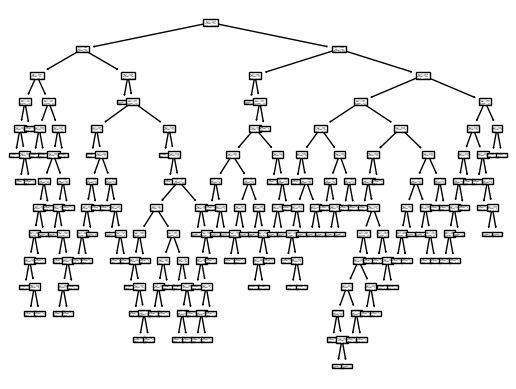

In [88]:
tree.plot_tree(model_gini)

In [89]:
y_pred1 = model_gini.predict(X_test)

In [90]:
from sklearn import metrics
print("Accuracy Score : ", metrics.accuracy_score(Y_test, y_pred1))

Accuracy Score :  0.8051948051948052


### Checking for a max depth value of 13.

In [91]:
model_gini1 = DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth = 13, min_samples_leaf = 1)

In [92]:
model_gini1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=13, random_state=100)

[Text(0.4033954326923077, 0.9642857142857143, 'x[1] <= 123.5\ngini = 0.461\nsamples = 614\nvalue = [393, 221]'),
 Text(0.14483173076923078, 0.8928571428571429, 'x[7] <= 28.5\ngini = 0.301\nsamples = 352\nvalue = [287, 65]'),
 Text(0.052884615384615384, 0.8214285714285714, 'x[5] <= 30.95\ngini = 0.162\nsamples = 202\nvalue = [184, 18]'),
 Text(0.028846153846153848, 0.75, 'x[0] <= 7.0\ngini = 0.036\nsamples = 110\nvalue = [108, 2]'),
 Text(0.019230769230769232, 0.6785714285714286, 'x[6] <= 0.672\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(0.009615384615384616, 0.6071428571428571, 'gini = 0.0\nsamples = 99\nvalue = [99, 0]'),
 Text(0.028846153846153848, 0.6071428571428571, 'x[6] <= 0.697\ngini = 0.18\nsamples = 10\nvalue = [9, 1]'),
 Text(0.019230769230769232, 0.5357142857142857, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.038461538461538464, 0.5357142857142857, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.038461538461538464, 0.6785714285714286, 'gini = 0.0\nsam

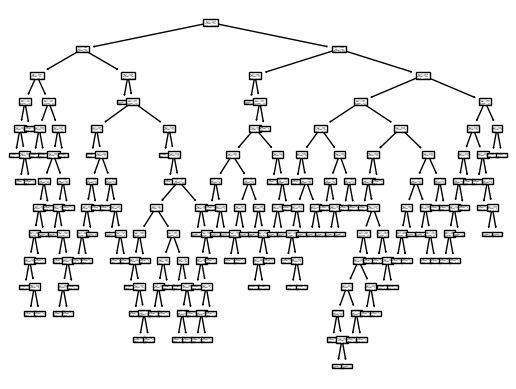

In [93]:
tree.plot_tree(model_gini1)

In [94]:
y_pred2 = model_gini1.predict(X_test)
print("Accuracy Score : ", metrics.accuracy_score(Y_test, y_pred2))

Accuracy Score :  0.8051948051948052


Trying with Entropy now:

In [79]:
model_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth = None, min_samples_leaf = 1)

In [80]:
model_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=100)

[Text(0.413422131147541, 0.9736842105263158, 'x[1] <= 123.5\nentropy = 0.943\nsamples = 614\nvalue = [393, 221]'),
 Text(0.11031420765027322, 0.9210526315789473, 'x[5] <= 26.45\nentropy = 0.69\nsamples = 352\nvalue = [287, 65]'),
 Text(0.02185792349726776, 0.868421052631579, 'x[6] <= 0.675\nentropy = 0.083\nsamples = 97\nvalue = [96, 1]'),
 Text(0.01092896174863388, 0.8157894736842105, 'entropy = 0.0\nsamples = 79\nvalue = [79, 0]'),
 Text(0.03278688524590164, 0.8157894736842105, 'x[6] <= 0.705\nentropy = 0.31\nsamples = 18\nvalue = [17, 1]'),
 Text(0.02185792349726776, 0.7631578947368421, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04371584699453552, 0.7631578947368421, 'entropy = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.1987704918032787, 0.868421052631579, 'x[7] <= 28.5\nentropy = 0.813\nsamples = 255\nvalue = [191, 64]'),
 Text(0.09836065573770492, 0.8157894736842105, 'x[5] <= 30.95\nentropy = 0.549\nsamples = 134\nvalue = [117, 17]'),
 Text(0.06557377049180328, 0.76

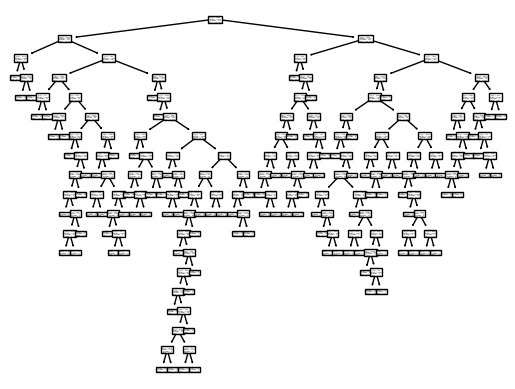

In [81]:
tree.plot_tree(model_entropy)

In [67]:
y_pred3 = model_entropy.predict(X_test)
print("Accuracy Score : ", metrics.accuracy_score(Y_test, y_pred3))

Accuracy Score :  0.7272727272727273


### Hence from the above results, we see that for this dataset, the Gini performs better due to better accuracy results.